# Matplotlib Style Sheets: Pre-packaged Visual Themes

## Introduction

In the last lesson we saw how to change the look and feel of our plots, both on the fly by altering the settings in the `rcParams` object, and permanently by adding them to our `matplotlibrc` file. There may come a time though, when you've created a style that you want to share with the rest of the world, or you may have multiple styles that you like to use for different reasons. When that time comes, you'll want to capture those settings in a style sheet.

Style sheets provide several key benefits for your visualization workflow:

- **Consistency**: Apply the same visual style across multiple figures and projects
- **Reusability**: Package up complex styling settings into a reusable component
- **Sharing**: Easily share your visualization style with colleagues and the community
- **Context-switching**: Quickly switch between different visual themes for different audiences

In this lesson, and the next, we'll see what matplotlib style sheets can do for us, and we'll begin by taking a look at the default styles that come with matplotlib.

In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Set a random seed for reproducible results
np.random.seed(42)

## What is a Style Sheet?

At the end of our last lesson, we saved a handful of default settings into our `matplotlibrc` file. Rather than doing that, we could have created a style sheet to hold these settings, and used it whenever we wanted a break from the norm. A style sheet is nothing more than a file with the extension `.mplstyle`, that resides in one a few default locations, and contains a handful of key/value pairs just like our `matplotlibrc` file.

### Style Sheet Structure

Style sheets have a simple structure:

```
# This is a comment
parameter.name1 : value1  # Optional inline comment
parameter.name2 : value2
```

This format is identical to the `matplotlibrc` file we saw in the previous lesson. The key difference is that style sheets are designed to be modular, reusable, and can be applied selectively rather than serving as your global default.

We'll see how to create a style sheet in the next lesson, but first, we're going to take a look at a few of the default style sheets that ship with matplotlib and see how to apply them.

Before we start though, we should take a snapshot of the current settings so we can reset them later, since style sheets basically alter the global settings in the `rcParams` object. This is good practice when experimenting with different styles within a single session.

In [2]:
# Save the current default rcParams for later restoration
default_rcParams = dict(mpl.rcParams)

### Default Styles

Now, let's see what style sheets matplotlib has for us by default. The list of available styles are contained in the `pyplot.style.available` list, so we can see all of the styles available by simply printing each element in this list.

Matplotlib comes with several built-in style sheets that are designed for different purposes and aesthetics. These range from publication-ready styles to styles that mimic other popular visualization libraries or publications.

<!--- To see the list of available style sheets, you simply need to print the `pyplot.style.available` attribute. --->

In [3]:
# Print all available style sheets
print("Available matplotlib style sheets:")
print("-" * 30)
for style in plt.style.available:
    print(style)

Available matplotlib style sheets:
------------------------------
Solarize_Light2
_classic_test_patch
_mpl-gallery
_mpl-gallery-nogrid
bmh
classic
dark_background
fast
fivethirtyeight
ggplot
grayscale
petroff10
seaborn-v0_8
seaborn-v0_8-bright
seaborn-v0_8-colorblind
seaborn-v0_8-dark
seaborn-v0_8-dark-palette
seaborn-v0_8-darkgrid
seaborn-v0_8-deep
seaborn-v0_8-muted
seaborn-v0_8-notebook
seaborn-v0_8-paper
seaborn-v0_8-pastel
seaborn-v0_8-poster
seaborn-v0_8-talk
seaborn-v0_8-ticks
seaborn-v0_8-white
seaborn-v0_8-whitegrid
tableau-colorblind10


### Applying Style Sheets

To see one of these styles in action, you simply need to call the `pyplot.style.use` function and pass in the name of the style you want to use. Ultimately, this function will read the settings in the style into a dictionary object and call the `update` function on the `rcParams` object passing in the dictionary of style sheet settings. This has the effect of permanently altering the values in the `rcParams` object for the duration of your session.

#### Style Categories Overview

The built-in style sheets generally fall into several categories:

1. **Base Styles**: Like 'default' and 'classic' - provide basic formatting
2. **Publication Styles**: Like 'seaborn', 'ggplot' - designed for publication-quality figures
3. **Media Styles**: Like 'fivethirtyeight', 'bmh' - mimic specific publications or media outlets
4. **Aesthetic Styles**: Like 'dark_background' - designed for specific visual needs

In the next cell, we'll use the `ggplot` style modelled after the [ggplot2][1] library written by [Hadley Wickham][2] for the [R statistical programming language][3]. I've used R a good deal in the past, and I personally love the ggplo2 library, both for the way it works and for its snazzy looks, so I tend to use this style a lot in my own work. But, personal recommendations aside, it's as good a place as any to start our exploration, so let's load it up and give it a try.

<!---, and so it will have side effects that will last throughout the entire session and this method of applying a style sheet is only recommended if you plan on using a single style for the entire session. If you plan on switching styles in a single session, you--->

[1]: http://ggplot2.org/
[2]: http://had.co.nz/
[3]: https://www.r-project.org/

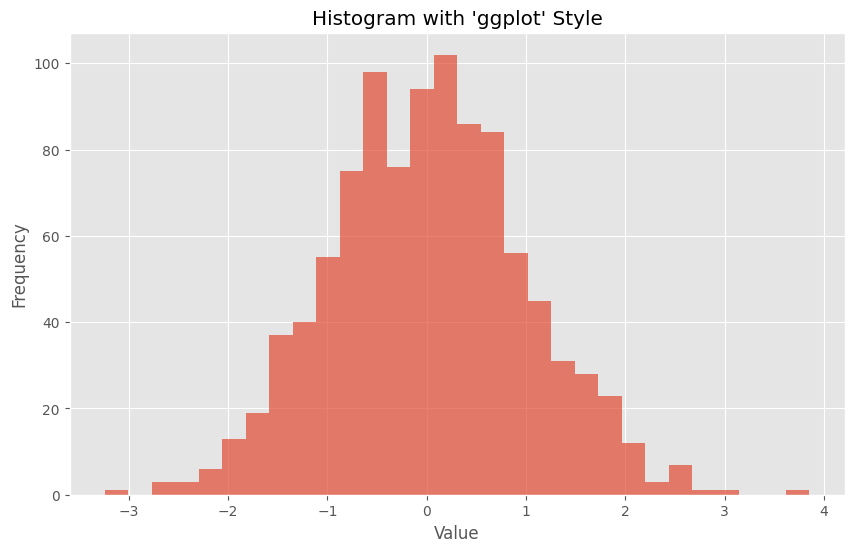

In [4]:
# Apply the ggplot style globally
plt.style.use('ggplot')

# Create a histogram with random data
plt.figure(figsize=(10, 6))
plt.hist(np.random.randn(1000), bins=30, alpha=0.7)
plt.title("Histogram with 'ggplot' Style")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [5]:
# Let's examine how the ggplot style affects figure-related parameters
print("Figure-related parameters in the 'ggplot' style:")
print("-" * 50)
for k,v in mpl.rcParams.items():
    if k.startswith('figure'): print(k, v)

Figure-related parameters in the 'ggplot' style:
--------------------------------------------------
figure.autolayout False
figure.constrained_layout.h_pad 0.04167
figure.constrained_layout.hspace 0.02
figure.constrained_layout.use False
figure.constrained_layout.w_pad 0.04167
figure.constrained_layout.wspace 0.02
figure.dpi 100.0
figure.edgecolor 0.50
figure.facecolor white
figure.figsize [6.4, 4.8]
figure.frameon True
figure.hooks []
figure.labelsize large
figure.labelweight normal
figure.max_open_warning 20
figure.raise_window True
figure.subplot.bottom 0.11
figure.subplot.hspace 0.2
figure.subplot.left 0.125
figure.subplot.right 0.9
figure.subplot.top 0.88
figure.subplot.wspace 0.2
figure.titlesize large
figure.titleweight normal


Pretty nice, right? I know what you're thinking, "Finally, a good looking graph in matplotlib!" The `ggplot` style provides a clean, modern aesthetic with a light gray background and a grid that helps distinguish data points without being visually overwhelming.

Some key characteristics of the `ggplot` style include:

- Light gray background with white grid lines
- Removed top and right spines
- Vibrant default color cycle
- Clean, minimalist aesthetic

We all know that matplotlib is powerful, but it's nice to see that with just one extra command, you can get good looking visualizations right out of the box as well. Speaking of which, let's take a look at one more.

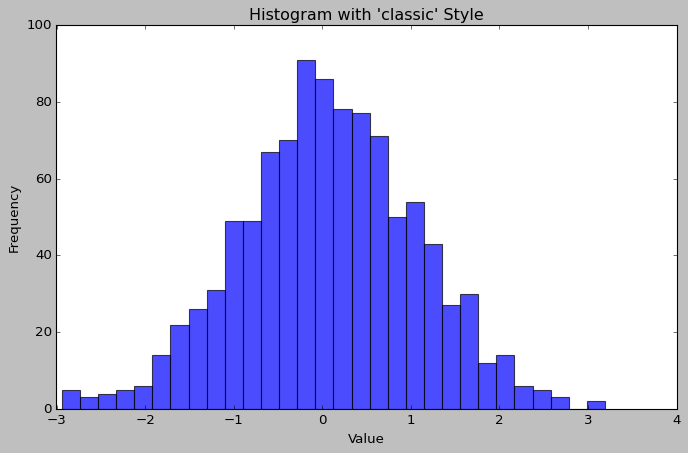

In [6]:
# Switch to the classic style
plt.style.use('classic')

# Create the same histogram but with classic style
plt.figure(figsize=(10, 6))
plt.hist(np.random.randn(1000), bins=30, alpha=0.7)
plt.title("Histogram with 'classic' Style")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [7]:
# Check the figure size parameter
print("Current figure size:", mpl.rcParams['figure.figsize'])

Current figure size: [8.0, 6.0]


Ok, so maybe this one isn't all that good looking, but it does serve a purpose. The 'classic' style mimics the original matplotlib look from earlier versions, which some users may prefer for consistency with older visualizations or documentation.

### Style Inheritance and Parameter Persistence

If we were to try and use the `ggplot` style again after using the 'classic' style, we might notice some unexpected behavior. This is due to how styles are applied in matplotlib.

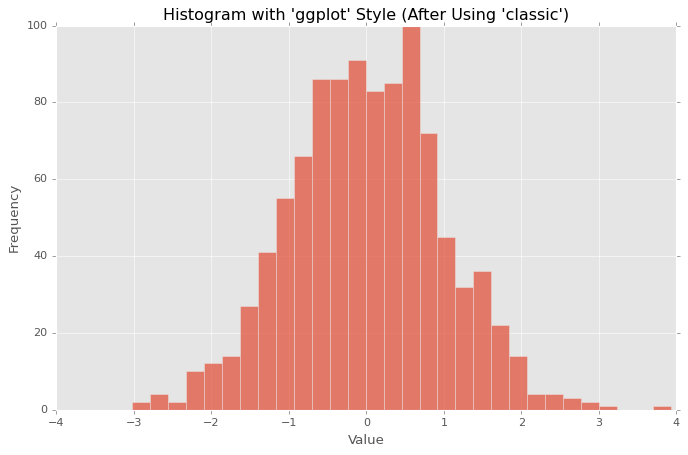

In [8]:
# Switch back to ggplot style
plt.style.use('ggplot')

# Create another histogram
plt.figure(figsize=(10, 6))
plt.hist(np.random.randn(1000), bins=30, alpha=0.7)
plt.title("Histogram with 'ggplot' Style (After Using 'classic')")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

Notice this time that, though it looks pretty much the same as before, it's quite a bit bigger this time. In fact, it's the exact same size as the previous example, and there's a good reason for that. Remember, earlier I mentioned that the `pyplot.style.use` function ultimately just calls `update` on the `rcParams` dictionary object. The problem with this implementation is that the `update` function only updates the values for a given set of keys, so if a key isn't present in the dict passed into `update`, that key's value stays the same.

The `classic` style obviously sets the figure size to something larger than the default, and since the `ggplot` style doesn't touch the figure size, your new style essentially inherits the figure size from the previous one. 

**This behavior demonstrates an important principle**: Style sheets only change the parameters they explicitly specify. All other parameters retain their current values, which may have been set by previous style sheets or manual adjustments.

## Using Style Sheets Without Side Effects

Now, if you're only planning on using a single style throughout the entire notebook, script, interactive session, or whatever, you're probably fine just calling the `pyplot.style.use` function to set that style. However, if you plan on switching styles throughout, as we're doing here, you'll want to use the context manager that the `pyplot.style` module provides instead. To see an example of the `pyplot.style.context` in action, we'll first need to reset our `rcParams` object with the default settings we saved at the beginning of this lesson.

In [9]:
# Reset rcParams to our saved defaults
mpl.rcParams.update(default_rcParams)

### The Style Context Manager

Then, we can use the `pyplot.style.context` function to set the style we want temporarily and leave the global `rcParams` object alone. The context manager approach has several advantages:

1. **Scope Control**: Style changes only apply within the context block
2. **Automatic Cleanup**: Original settings are restored when exiting the context
3. **No Side Effects**: Other code is not affected by the temporary style changes

We'll give it a try in the next cell, and this time we'll try one of the other built-in styles. This time, we'll use the `fivethirtyeight` style, which is a style designed to mimic the look and feel of the graphs found on Nate Silver's data blog [FiveThirtyEight.com][1]—which, by the way, is an excellent read, if you're not familiar with it.

[1]: http://fivethirtyeight.com/

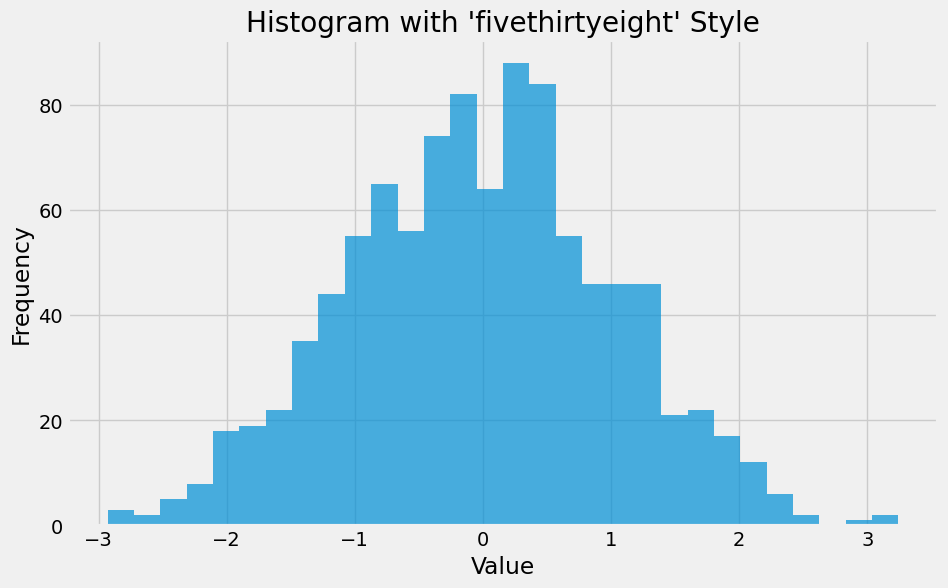

In [10]:
# Use the fivethirtyeight style temporarily with a context manager
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10, 6))
    plt.hist(np.random.randn(1000), bins=30, alpha=0.7)
    plt.title("Histogram with 'fivethirtyeight' Style")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

The `fivethirtyeight` style has distinctive characteristics that make it instantly recognizable to readers of the website:

- Bold, sans-serif fonts that match the website's typography
- Distinctive color palette with muted tones
- Minimal grid lines and removed top and right spines
- Larger figure size for better readability

And, now if we call the same plotting function again, this time outside of the context manager, we'll see that the default style has not been affected in anyway by our usage of the `fivethirtyeight` style above.

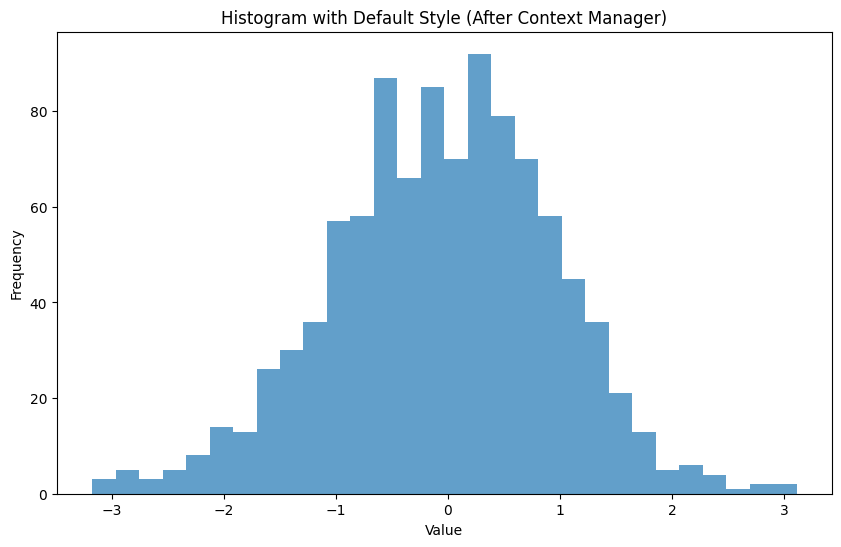

In [11]:
# Create a plot with default settings (outside the context manager)
plt.figure(figsize=(10, 6))
plt.hist(np.random.randn(1000), bins=30, alpha=0.7)
plt.title("Histogram with Default Style (After Context Manager)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

## Advanced Style Sheet Usage

One final note before moving on, both the `pyplot.style.use` and `pyplot.style.context` functions are overloaded to take different types of data. We've been passing in a single string representing the style we want to use, but we can also pass in a dict specifying just the attributes that we want to update.

### Creating Temporary Custom Styles

The example below temporarily changes several of the characteristics of a line graph for a single plot. This approach is useful when you want a one-off custom style without creating a full style sheet file. Let's run it and see how it looks.

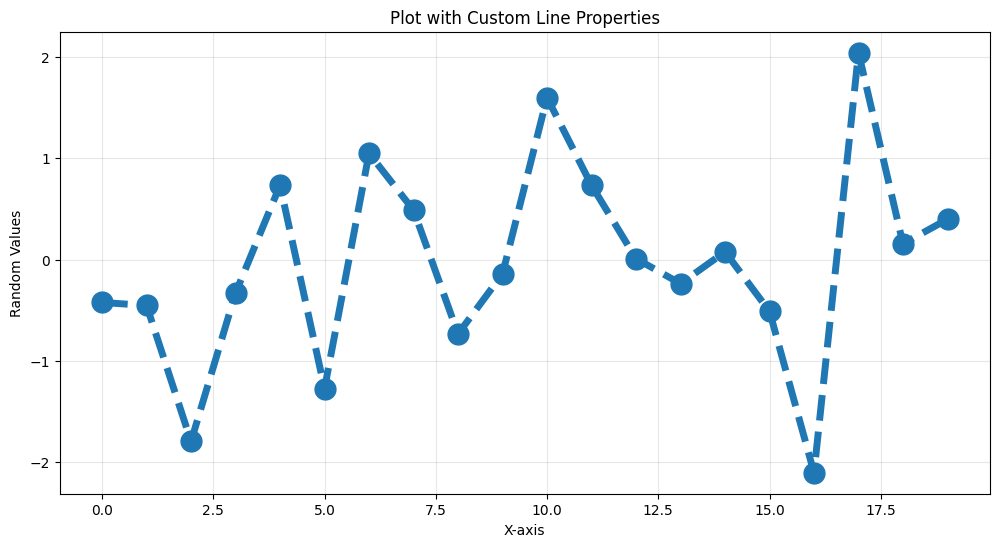

In [12]:
# Create a one-off custom style using a dictionary
with plt.style.context({'lines.linewidth': 5, 
                        'lines.linestyle': '--', 
                        'lines.marker': 'o', 
                        'lines.markersize': 15,
                        'lines.color': 'navy',
                        'figure.figsize': (12, 6)}):
    plt.figure()
    plt.plot(np.random.randn(20))
    plt.title("Plot with Custom Line Properties")
    plt.xlabel("X-axis")
    plt.ylabel("Random Values")
    plt.grid(alpha=0.3)
    plt.show()

### Combining Multiple Styles

And, since styles simply update the current settings rather than overwrite them completely, it's possible to use multiple styles together. Both the `pyplot.style.use` and the `pyplot.style.context` functions will accept a list of either strings specifying the styles to use, or dicts specifying the attributes to be changed. This will result in the `update` function being called for each element in the list in the order in which they appear.

This technique allows you to:

1. Begin with a base style (like 'ggplot' or 'seaborn')
2. Override specific parameters for your particular needs
3. Create a composite style that combines the best of multiple approaches

As an example, the code in the next cell, uses the `ggplot` style, and also passes in a dict that specifies a slightly taller figure size than the default.

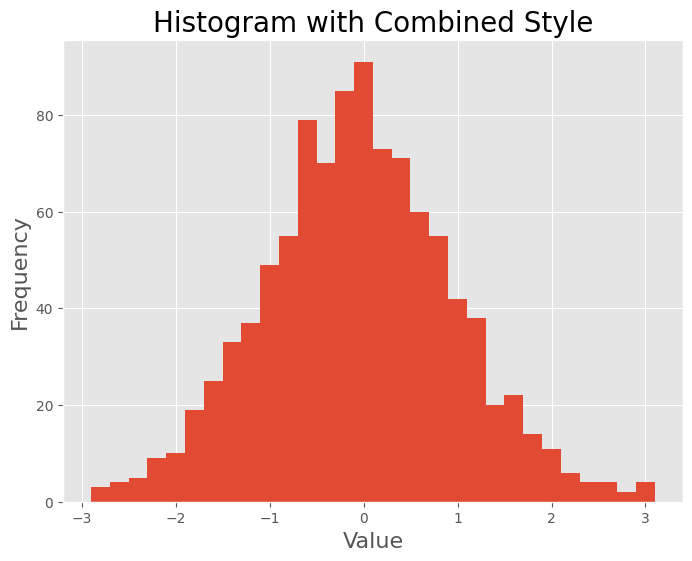

In [13]:
# Combine a named style with custom overrides
with plt.style.context(['ggplot', {'figure.figsize': [8.0, 6.0], 'axes.titlesize': 20, 'axes.labelsize': 16}]):
    plt.figure()
    plt.hist(np.random.randn(1000), bins=30)
    plt.title("Histogram with Combined Style")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

And, that looks pretty much exactly the same as the plot we saw above, but of course, we're now seeing it in a taller version with larger title and axis labels than the typical ggplot style would allow.

## Conclusion

And, that will bring us to the very end of this lesson.

### Summary of Key Concepts

To recap, we learned several important concepts about matplotlib style sheets:

1. **Style Sheet Basics**: Style sheets are modular configurations of matplotlib parameters saved in `.mplstyle` files

2. **Built-in Styles**: Matplotlib comes with several pre-configured styles for different visualization needs:
   - Publication-quality styles like `ggplot` and `seaborn`
   - Media-specific styles like `fivethirtyeight`
   - Special purpose styles like `dark_background`

3. **Applying Styles**: Two main methods to apply styles:
   - `plt.style.use()` for global changes throughout your session
   - `plt.style.context()` for temporary, isolated style changes

4. **Style Inheritance**: Styles only change parameters they explicitly define; other parameters retain their existing values

5. **Custom Styling**: You can create one-off custom styles using dictionaries or combine multiple styles

In the next lesson, we'll take this knowledge one step further, and close out our look at configuring matplotlib by learning how to create our very own styles.

### Practical Applications

Style sheets are particularly useful for:

- Creating consistent visualizations across a research paper or presentation
- Matching your organization's branding guidelines
- Creating different visualization styles for different audiences (technical vs. general)
- Quickly switching between day and night modes (light vs. dark backgrounds)